In [2]:
import numpy as np
from tensorflow.keras import datasets, utils

In [3]:
(xtrain, ytrain), (xtest, ytest) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
print("Shape of xtrain:", xtrain.shape)
print("Shape of xtest:", xtest.shape)
print("Shape of ytrain:", ytrain.shape)
print("Shape of ytest:", ytest.shape)

Shape of xtrain: (50000, 32, 32, 3)
Shape of xtest: (10000, 32, 32, 3)
Shape of ytrain: (50000, 1)
Shape of ytest: (10000, 1)


In [5]:
num_classes = 10
xtrain = xtrain.astype('float32')
xtest = xtest.astype('float32')
xtrain /= 255.0
xtest /= 255.0

In [6]:
ytrain = utils.to_categorical(ytrain, num_classes)
ytest = utils.to_categorical(ytest, num_classes)

In [7]:
#channel value of a specific pixel in an image
xtrain[54, 12, 13, 1]
#green channel (1) value of the pixel in the (12, 13) position of image 54

np.float32(0.36862746)

In [10]:
# #MLP using sequential model
# from tensorflow.keras import layers, models
# models = models.Sequential([
#     layers.Flatten(input_shape=(32, 32, 3)),
#     layers.Dense(200, activation='relu'),
#     layers.Dense(150, activation='relu'),
#     layers.Dense(10, activation='softmax'),
# ])

In [12]:
from tensorflow.keras import layers, models

In [13]:
#MLP using the functional API
input_layer = layers.Input(shape=(32, 32, 3)) # Define input explicitly
x = layers.Flatten()(input_layer) # Apply Flatten to input
x = layers.Dense(200, activation='relu')(x) # Apply Dense to previous output
x = layers.Dense(150, activation='relu')(x)
output_layer = layers.Dense(10, activation='softmax')(x) # Final output

In [14]:
from tensorflow.keras import Model

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras import optimizers
opt = optimizers.Adam(learning_rate=0.005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(xtrain, ytrain, batch_size=32, epochs=10, shuffle=True)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.2498 - loss: 2.2839
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.3204 - loss: 1.8463
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3318 - loss: 1.8195
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3385 - loss: 1.8114
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.3471 - loss: 1.7860
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.3484 - loss: 1.7812
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.3501 - loss: 1.7711
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3569 - loss: 1.7629
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.3600 - loss: 1.7585
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3632 - loss: 1.7562


In [17]:
#Evaluate the model performance on the test set
model.evaluate(xtest, ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3763 - loss: 1.7190


[1.7264823913574219, 0.3752000033855438]

In [18]:
#To view predictions on the test set using the predict method
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
preds = model.predict(xtest)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(ytest, axis = -1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


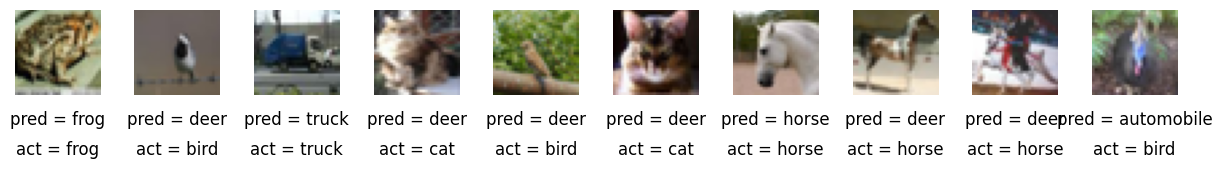

In [30]:
import matplotlib.pyplot as plt
import numpy as np

n_to_show = 10
indices = np.random.choice(range(0, len(xtest)), size=n_to_show, replace=False)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = xtest[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]),
            fontsize=12, ha='center', transform=ax.transAxes)
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]),
            fontsize=12, ha='center', transform=ax.transAxes)
    ax.imshow(img, cmap='gray')   # add cmap='gray' if grayscale images

plt.show()
